# **Crop and Fertilizer Recommendation System using ML**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
#target feature distribution
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [12]:
features = df.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


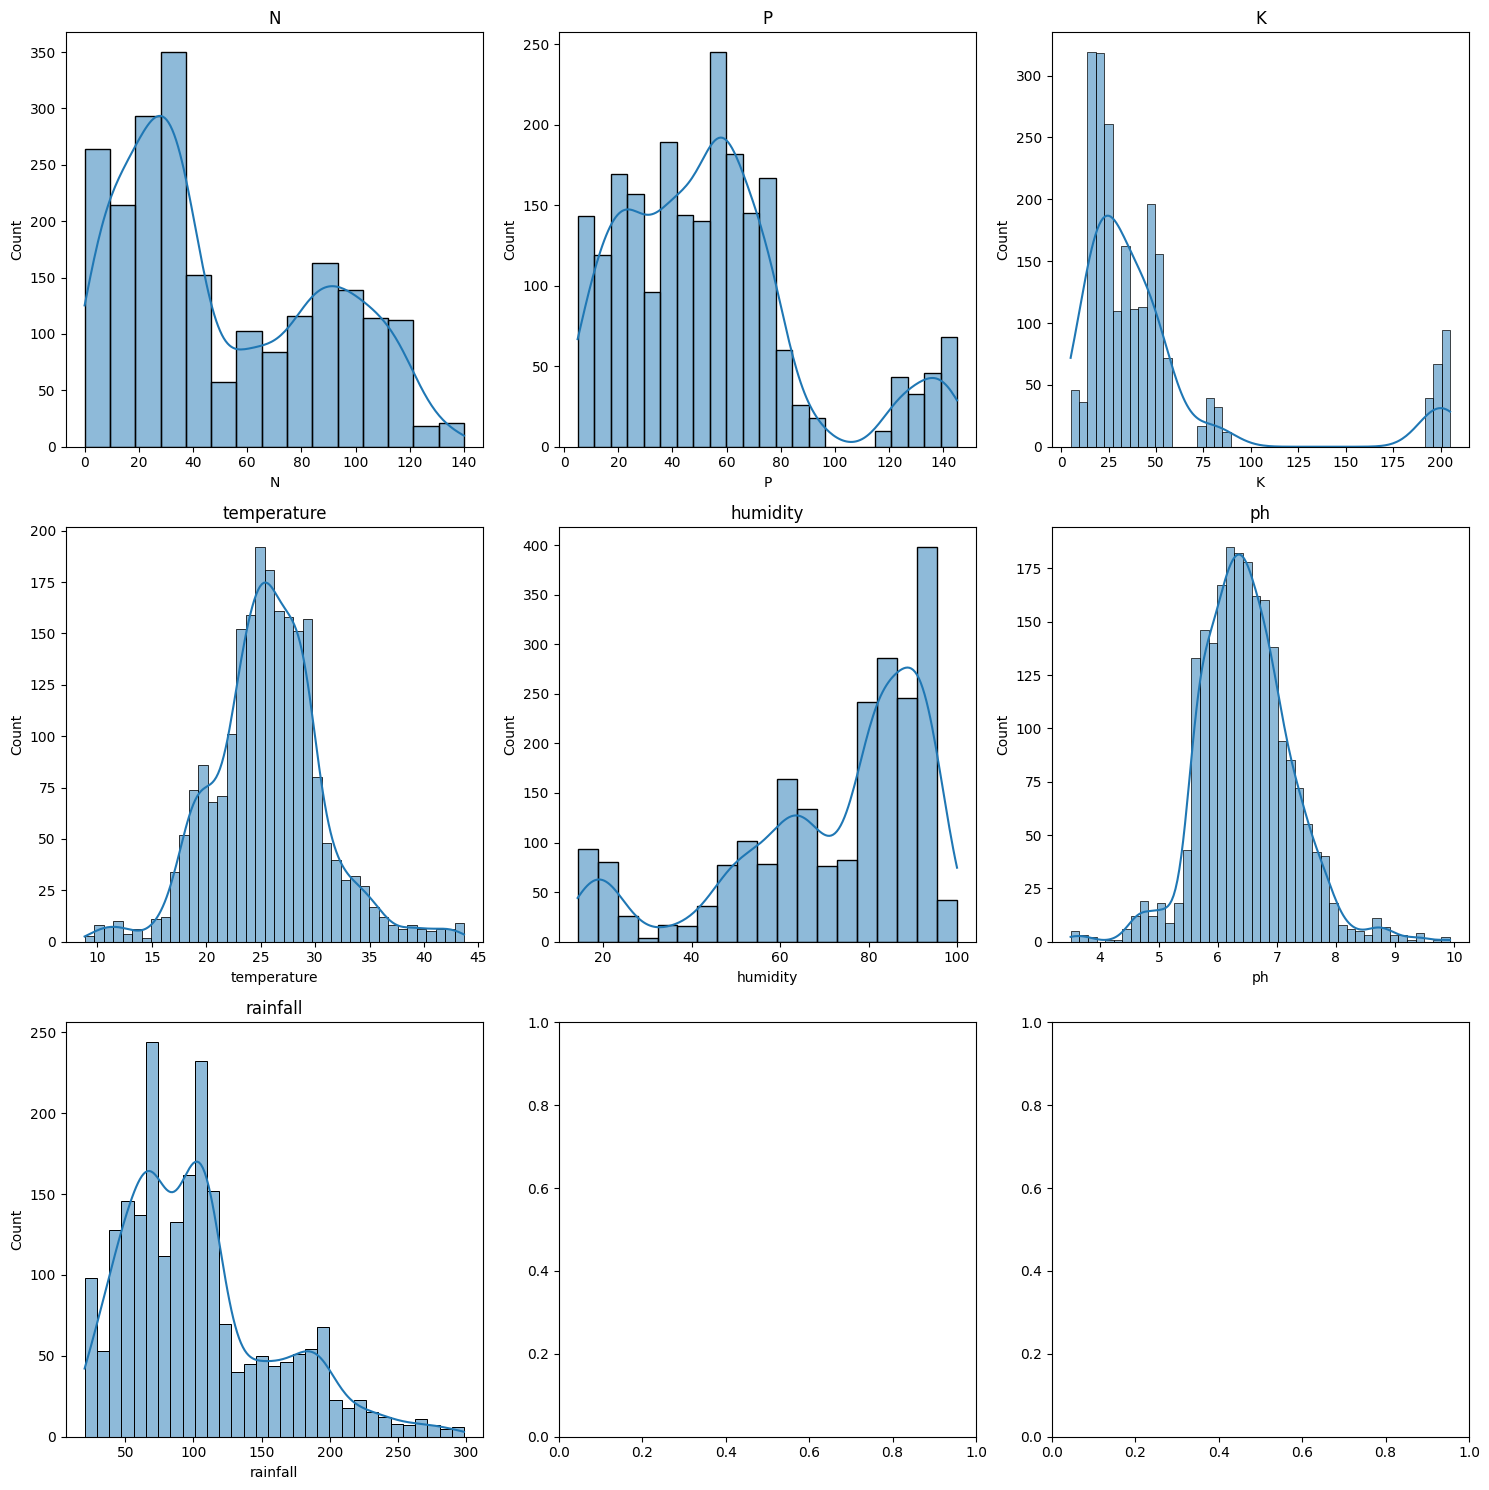

In [13]:
# Visualize the distribution of all features

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(df[i], ax=subplot , kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

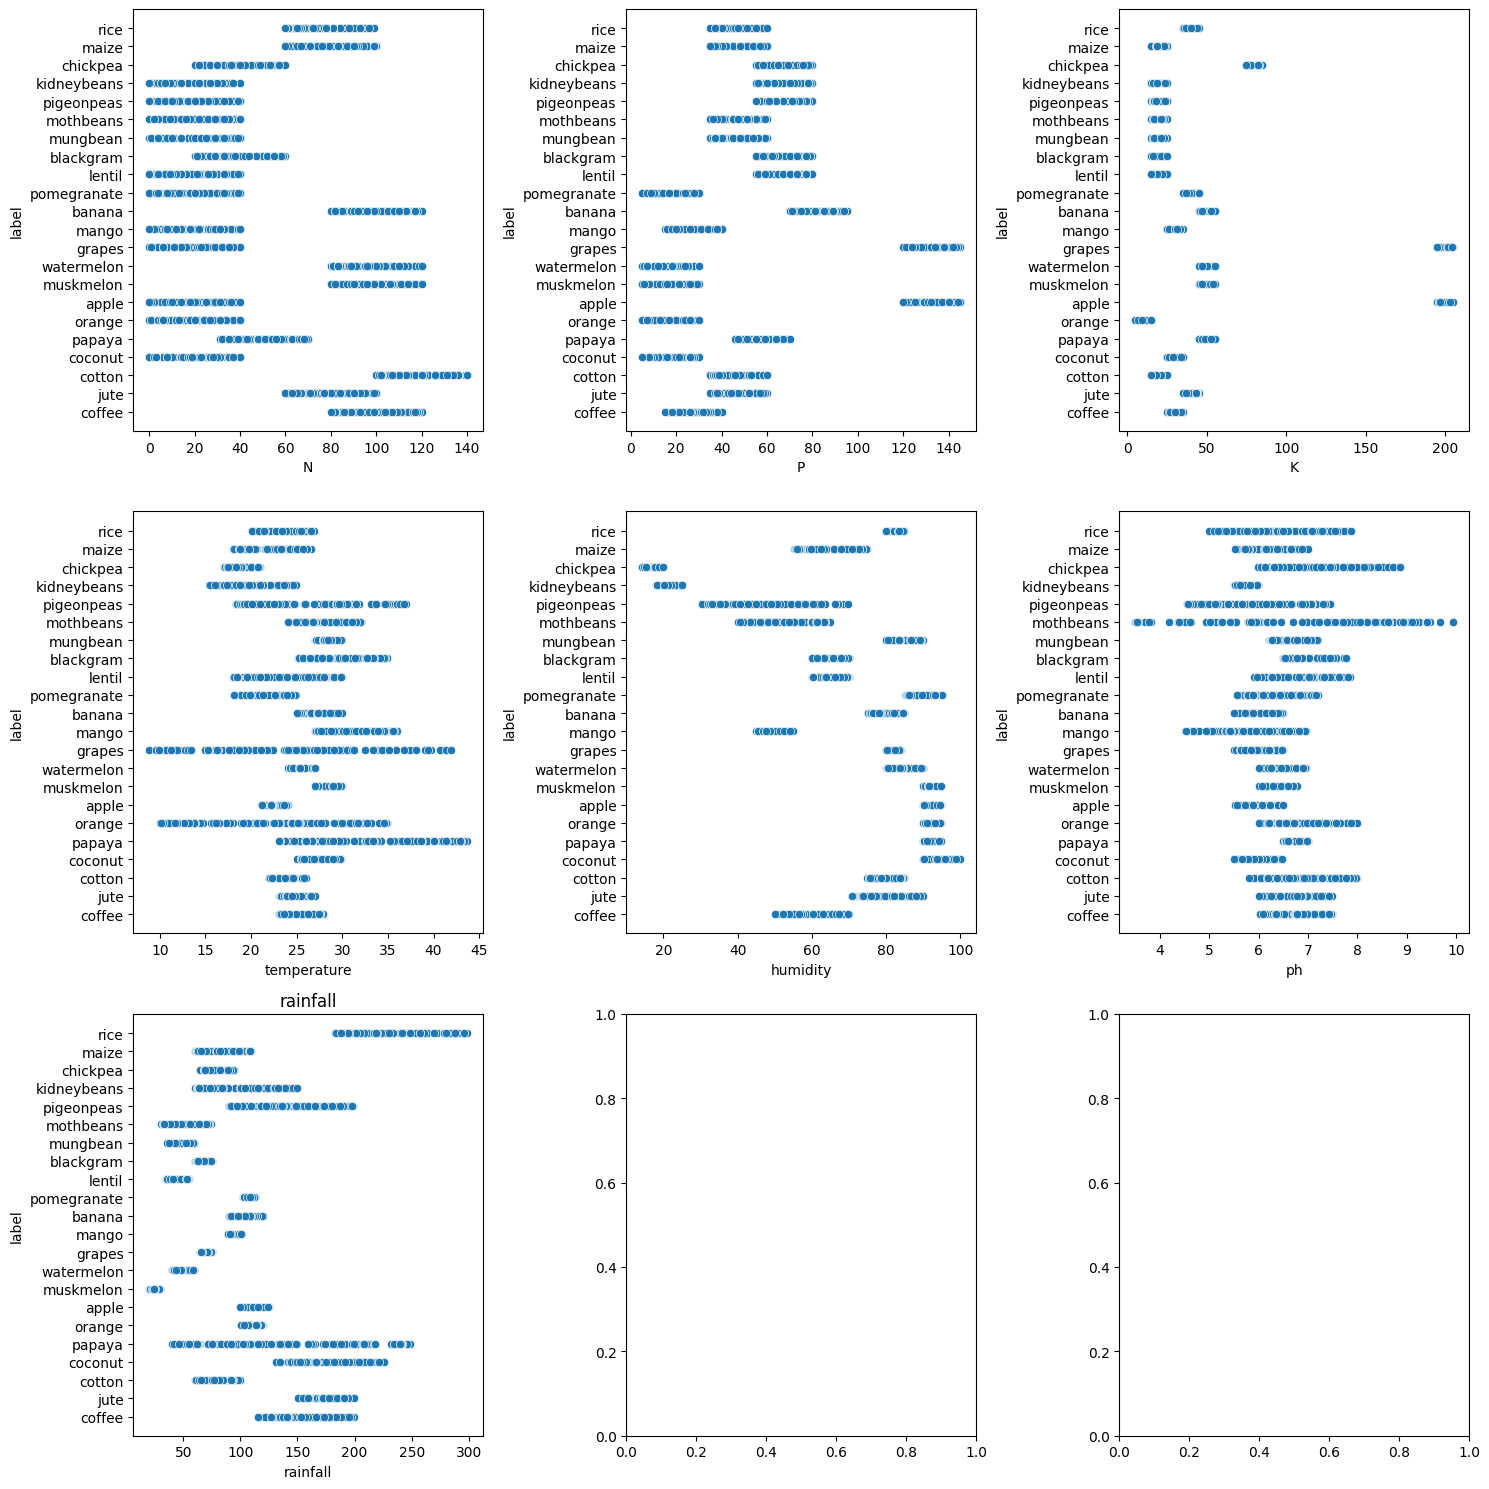

In [14]:
# Plotting Scatterplot

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(data=df, x=i, y='label', ax=subplot)
subplot.set_title(i)
plt.tight_layout()
plt.show()

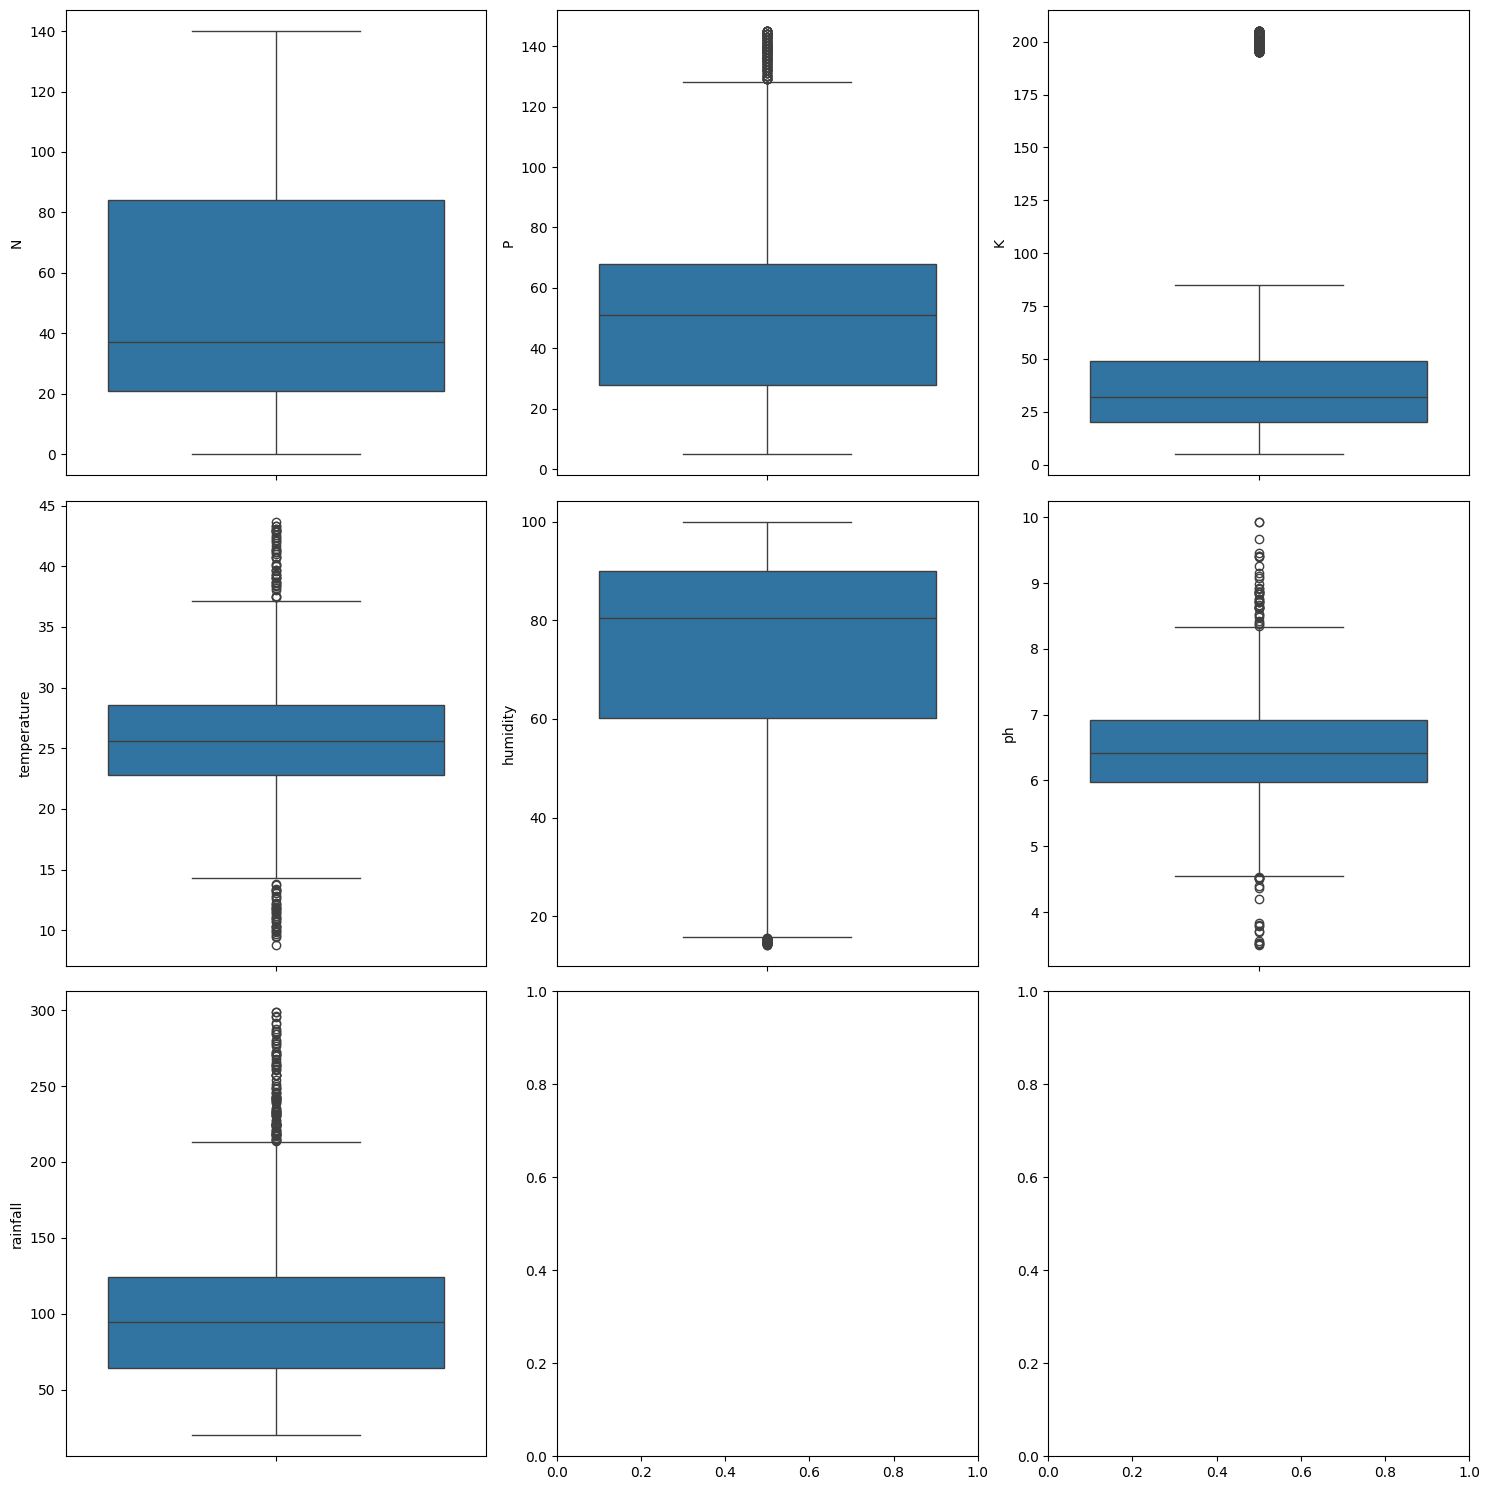

In [15]:
# finding outliers

fig, ax = plt.subplots(3 ,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.tight_layout()
plt.show()


In [16]:
# corelation of the features

num_cols = df.select_dtypes(include=np.number)
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [17]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


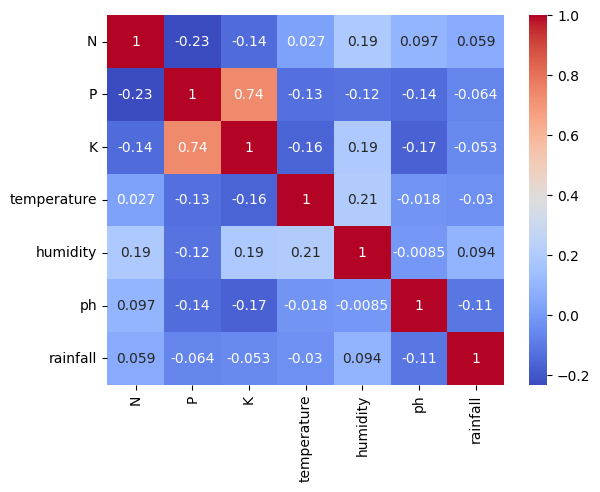

In [18]:
# visualizing the heatmap

sns.heatmap(corr , annot = True , cmap='coolwarm')
plt.show()

In [19]:
# start encoding

df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [20]:
crop_dict = {
    'rice' : 1 ,
    'maize' : 2,
    'chickpea' : 3 ,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8 ,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12 ,
    'grapes' : 13 ,
    'watermelon' : 14 ,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
}

In [21]:
df['crop_no'] = df['label'].map(crop_dict)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [22]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [23]:
df.drop('label' , axis=1 , inplace=True)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


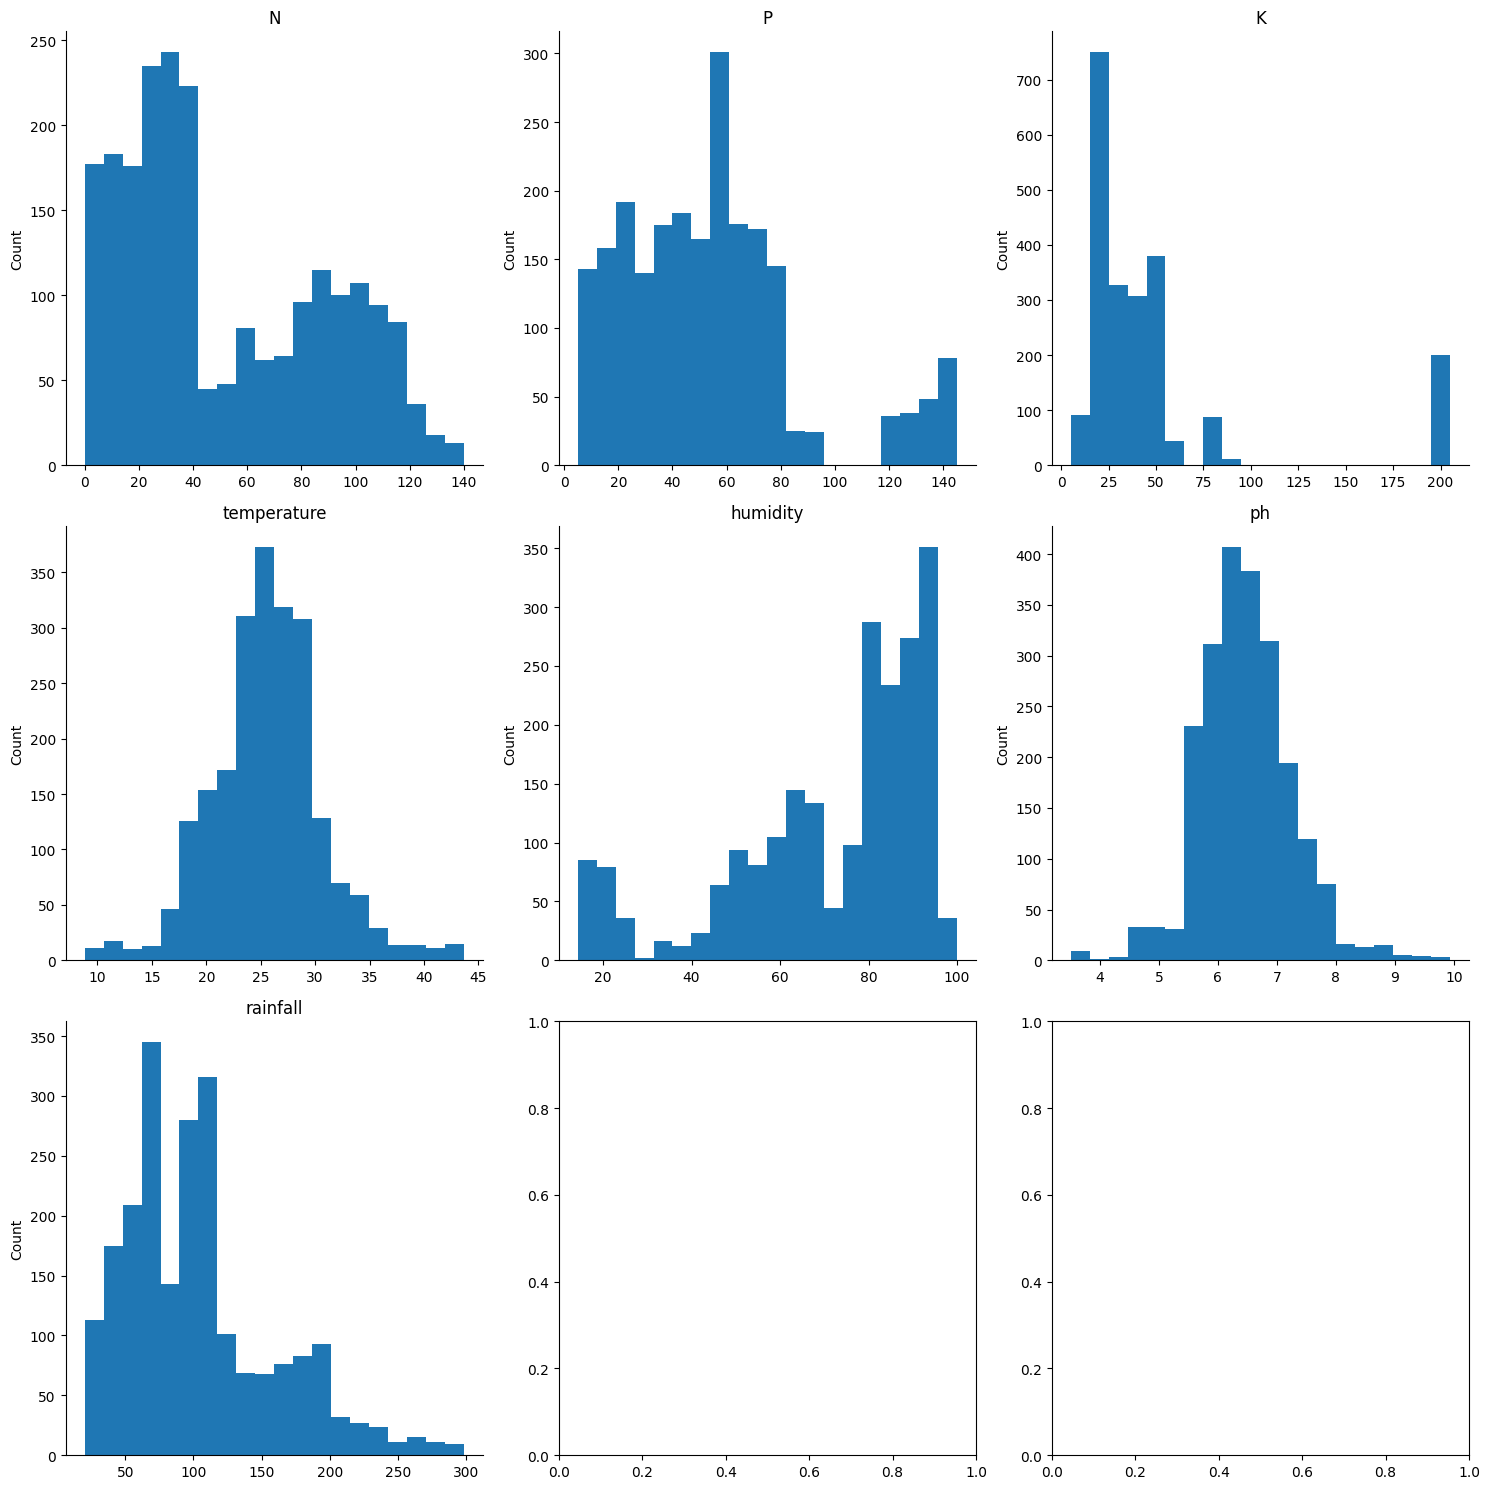

In [24]:
#visualizing hisplots

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    df[i].plot(kind='hist', bins=20, ax=subplot, title=i)
    subplot.spines[['top', 'right']].set_visible(False)
    subplot.set_xlabel('')
    subplot.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [37]:
# train test split

x = df.drop('crop_no' , axis=1)
y = df['crop_no']

In [38]:
x.shape

(2200, 7)

In [39]:
y.shape

(2200,)

In [101]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=85)

In [102]:
print("The number of data in X_Train has :",x_train.shape)
print("The number of data in X_Test has :",x_test.shape)
print("The number of data in Y_Train has :",y_train.shape)
print("The number of data in Y_Test has :",y_test.shape)

The number of data in X_Train has : (1760, 7)
The number of data in X_Test has : (440, 7)
The number of data in Y_Train has : (1760,)
The number of data in Y_Test has : (440,)


In [103]:
# Scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [104]:
# Training a model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scale , y_train)

DecisionTreeClassifier()

In [106]:
y_pred = dtc.predict(x_test_scale)
acs = accuracy_score(y_test , y_pred)
print("The accuracy score is :",acs)

The accuracy score is : 0.990909090909091


In [111]:
# Prediction

def prediction(N , P , K , temperature , humidity , ph , rainfall):
  features = np.array([[N , P , K , temperature , humidity , ph , rainfall]])
  features_scale = sc.transform(features)
  prediction = dtc.predict(features_scale).reshape(1, -1)
  crop_dict = {
          'rice' : 1 ,
    'maize' : 2,
    'chickpea' : 3 ,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8 ,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12 ,
    'grapes' : 13 ,
    'watermelon' : 14 ,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
  }
  crop = list(crop_dict.keys())[list(crop_dict.values()).index(prediction[0])]
  return crop

In [118]:
# Predicting with the values

N = 106
P = 68
K = 43
temperature = 24
humidity = 82
ph = 7
rainfall = 26

crop = prediction(N , P , K , temperature , humidity , ph , rainfall)
print("The recommended crop is :",crop)

The recommended crop is : banana


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [187]:
# Fertilizer Recommendation System

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [188]:
fert = pd.read_csv('/content/Fertilizer Prediction.csv')
fert

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [189]:
fert.shape

(99, 9)

In [190]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [191]:
fert.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [192]:
fert.duplicated().sum()

0

In [193]:
fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [194]:
fert_cols = fert.select_dtypes(include=np.number)
fert_cols

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [195]:
fert_co = fert_cols.corr()
fert_co

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


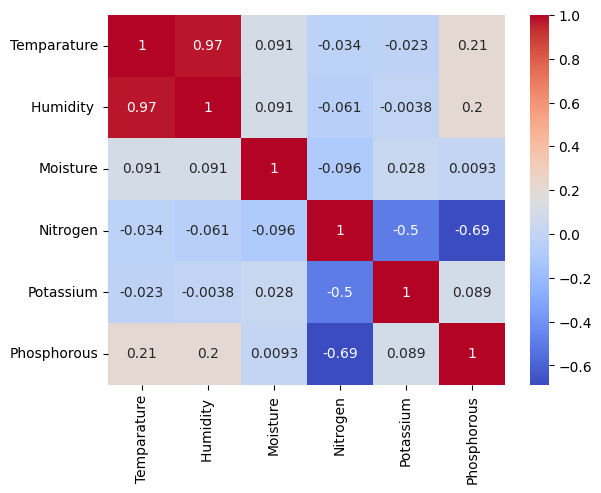

In [196]:
sns.heatmap(fert_co , annot=True , cmap='coolwarm')
plt.show()

In [197]:
fert['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10-26-26,7


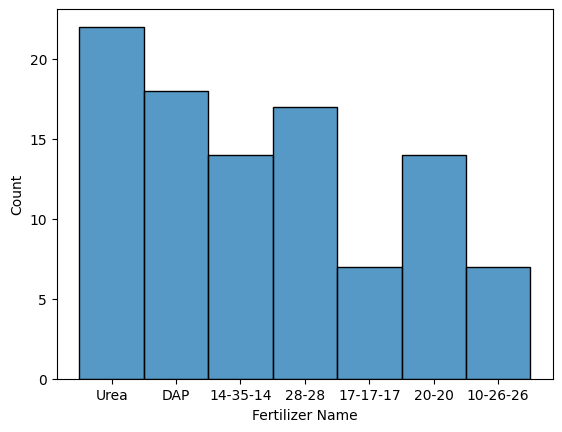

In [198]:
sns.histplot(fert['Fertilizer Name'])
plt.show()

In [199]:
fert_features = fert.select_dtypes(include=np.number).columns.to_list()
fert_features

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

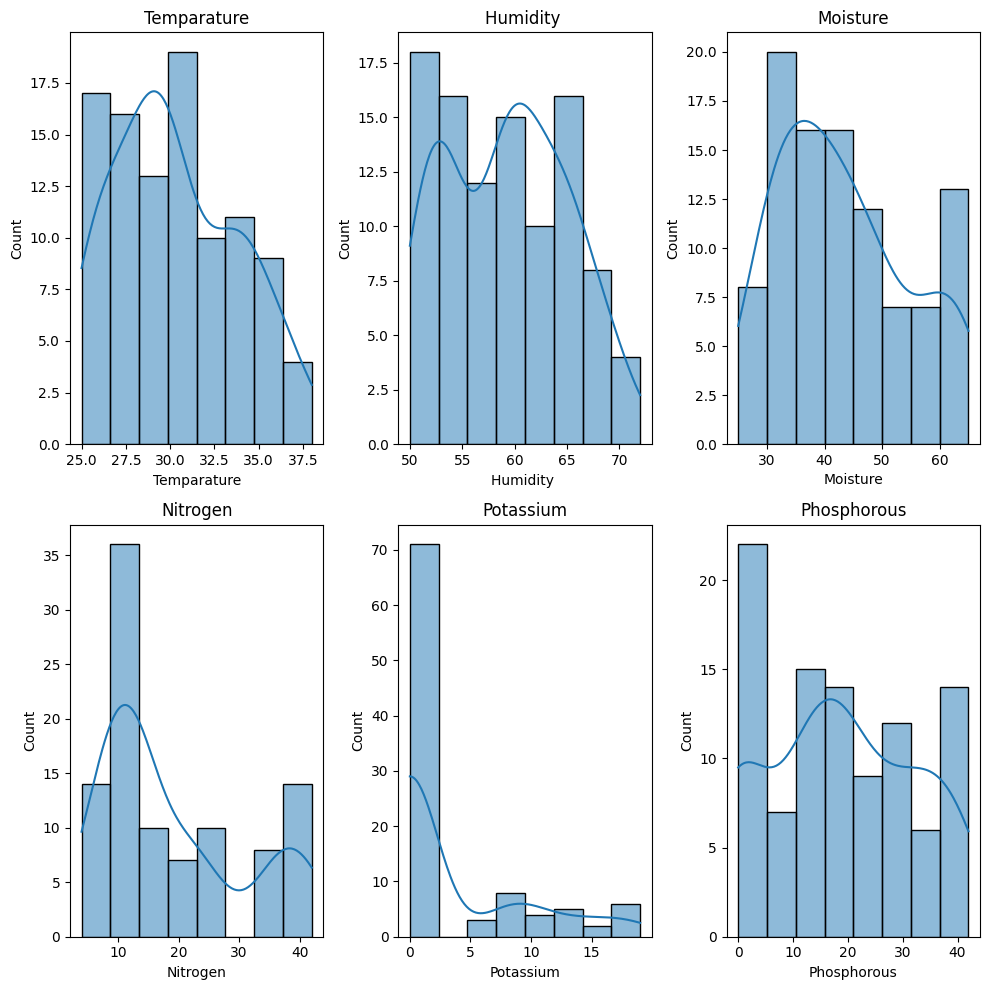

In [200]:
fig,ax = plt.subplots(2, 3, figsize=(10, 10))
for i, subplot in zip(fert_features, ax.flatten()):
    sns.histplot(fert[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

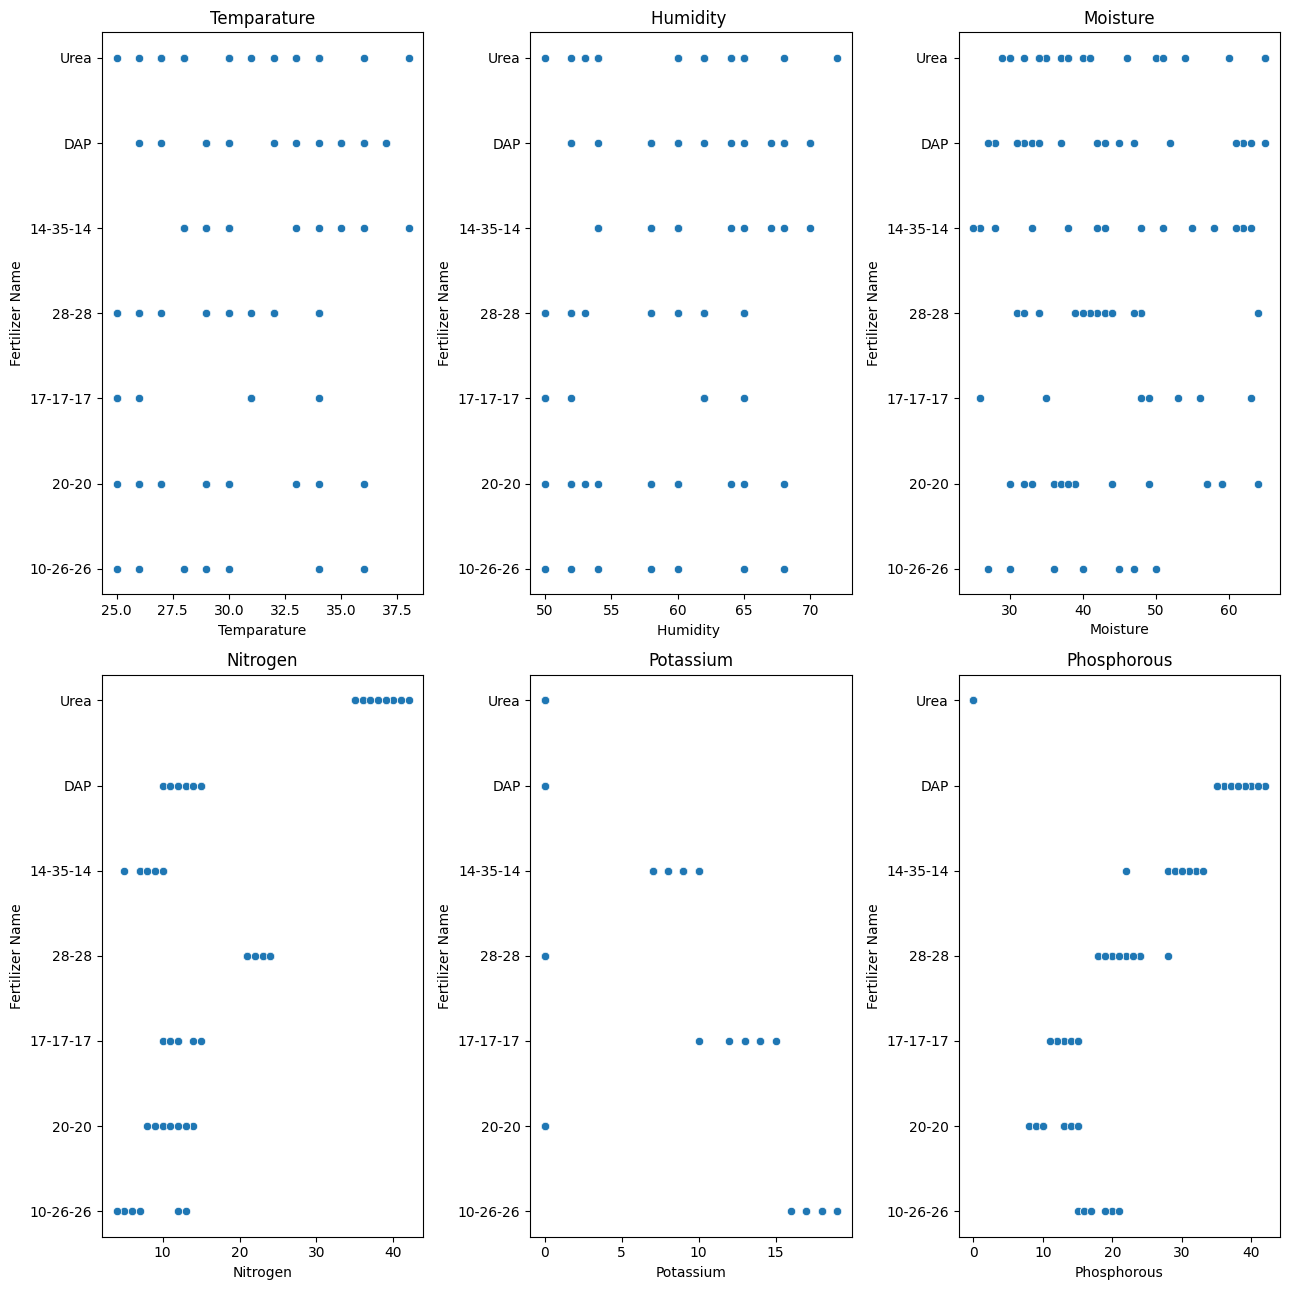

In [201]:
fig,ax = plt.subplots(2, 3, figsize=(13, 13))
for i, subplot in zip(fert_features, ax.flatten()):
    sns.scatterplot(data=fert, x=i, y='Fertilizer Name', ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

In [202]:
fert['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [203]:
fert_dict = {
    'Urea' : 1,
     'DAP' : 2 ,
     '14-35-14' : 3,
     '28-28' : 4,
     '17-17-17' : 5,
     '20-20' : 6,
     '10-26-26' : 7
}

In [204]:
fert['fert_no'] = fert['Fertilizer Name'].map(fert_dict)
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fert_no
0,26,52,38,Sandy,Maize,37,0,0,Urea,1
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,2
2,34,65,62,Black,Cotton,7,9,30,14-35-14,3
3,32,62,34,Red,Tobacco,22,0,20,28-28,4
4,28,54,46,Clayey,Paddy,35,0,0,Urea,1


In [205]:
fert['fert_no'].value_counts()

,count
fert_no,
1,22
2,18
4,17
3,14
6,14
5,7
7,7


In [206]:
fert.drop('Fertilizer Name' , axis=1 , inplace=True)
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [207]:
# Select the object columns
fert.select_dtypes(include=['object']).columns


Index(['Soil Type', 'Crop Type'], dtype='object')

In [208]:
# convert the categorical columns to numerical columns using labelencoder

lb = LabelEncoder()
fert['Crop Type'] = lb.fit_transform(fert['Crop Type'])
fert['Soil Type'] = lb.fit_transform(fert['Soil Type'])
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [209]:
# split the dataset into features and target

x = fert.drop('fert_no' , axis=1)
y = fert['fert_no']
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [210]:
# split the dataset into training and testing sets

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=50)
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [211]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [212]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [213]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [220]:
# evaluate the model on the test set and print the accuracy
fert_accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {fert_accuracy*100}%")

The accuracy of the model is: 100.0%


In [221]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:}%")

The accuracy of the model on the training set is: 100.0%


In [229]:
def fert_prediction(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
  features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
  transformed_features = sc.transform(features)
  prediction = model.predict(transformed_features).reshape(1,-1)
  fert_dict = {
    'Urea' : 1,
     'DAP' : 2 ,
     '14-35-14' : 3,
     '28-28' : 4,
     '17-17-17' : 5,
     '20-20' : 6,
     '10-26-26' : 7
  }
  fertilizier = [list(fert_dict.keys())[list(fert_dict.values()).index(int(i))] for i in prediction[0]]
  return fertilizier


In [242]:

Temparature = 36
Humidity = 14
Moisture = 13
Soil_Type = 6
Crop_Type = 3
Nitrogen = 10
Potassium = 18
Phosphorous = 29

fert_prediction(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['14-35-14']